In [1]:
import utilities.another_curr as ac
import utilities.shapes as sh
import importlib
import torch.nn as nn
import torch
importlib.reload(sh)
importlib.reload(ac)
from time import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
curri_level_1 , curri_level_2, curri_level_3 = ac.new_train_data_curriculum()

In [7]:
with open('pickle_lists/rand_losses_2_list.pkl', 'rb') as f:
    rand_losses_2_list = pickle.load(f)

with open('pickle_lists/times_rand_2_list.pkl', 'rb') as f:
    times_rand_2_list = pickle.load(f)

with open('pickle_lists/acc_rand_2_list.pkl', 'rb') as f:
    acc_rand_2_list = pickle.load(f)

In [4]:
test_data = sh.test_data()

In [22]:
acc_curri_2_list = []
times_curri_2_list = []
curri_losses_2_list =[]
for i in range (10):
    print(f"{i+1} - iteration")
    model = sh.ShapeCNN_2(num_classes=8)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    curri_losses_2 = []
    start_time = time()

    for epoch in range(3):
        batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
        curri_losses_2.extend(batch_losses)

    for epoch in range(3):
        batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
        curri_losses_2.extend(batch_losses)

    for epoch in range(3):
        batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
        curri_losses_2.extend(batch_losses)

    end_time = time()
    acc_curri_2 = sh.evaluate(model, test_data)
    time_curri_2 = end_time - start_time
    acc_curri_2_list.append(acc_curri_2)
    times_curri_2_list.append(time_curri_2)
    curri_losses_2_list.append(curri_losses_2)

1 - iteration
2 - iteration
3 - iteration
4 - iteration
5 - iteration
6 - iteration
7 - iteration
8 - iteration
9 - iteration
10 - iteration


/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_62757/1318583356.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Method', y='Value', data=data, ci=None, estimator='mean', palette='Set2')
/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_62757/1318583356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Value', data=data, ci=None, estimator='mean', palette='Set2')


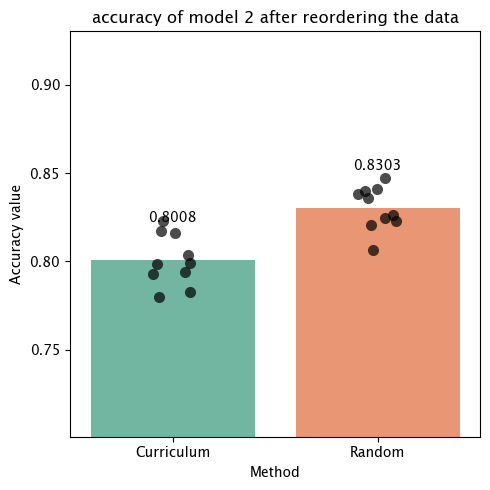

In [23]:
data = pd.DataFrame({
    'Value': acc_curri_2_list + acc_rand_2_list,
    'Method': ['Curriculum'] * 10 + ['Random'] * 10 
})
plt.figure(figsize=(5, 5))
sns.barplot(x='Method', y='Value', data=data, ci=None, estimator='mean', palette='Set2')
values = [np.mean(acc_curri_2_list),  np.mean(acc_rand_2_list) ]
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=10 )
sns.stripplot(x='Method', y='Value', data=data, color='black', alpha=0.7 , size = 8)
plt.ylim(min(values) - 0.1, max(values) + 0.1)
plt.title("accuracy of model 2 after reordering the data")
plt.ylabel("Accuracy value")
plt.tight_layout()
plt.show()

In [24]:
sh.evaluate(model, test_data)

0.799

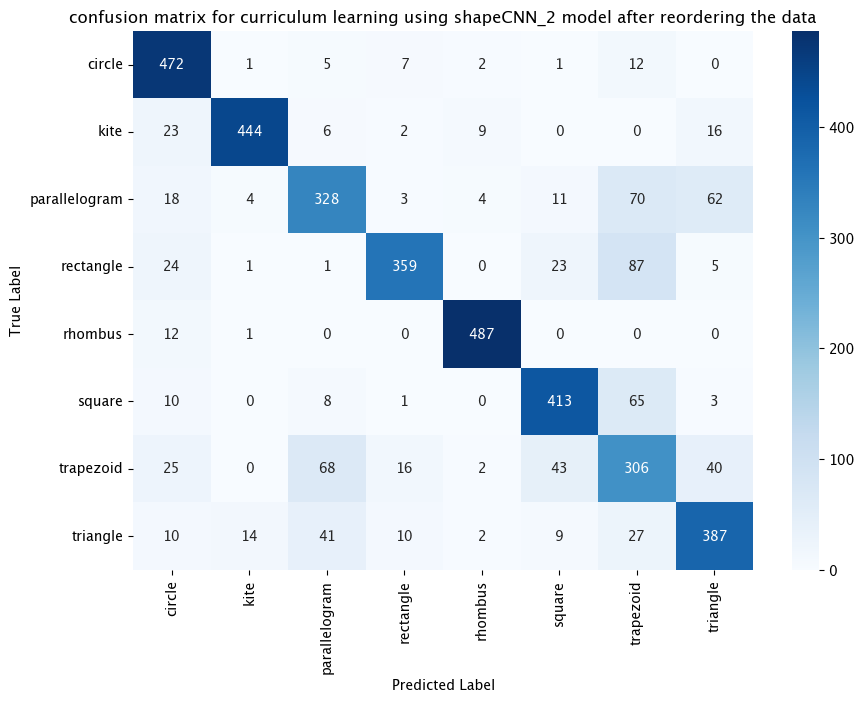

In [26]:
cm = sh.compute_confusion_matrix(model, test_data , 8  )
sh.plot_confusion_matrix(cm, ['circle', 'kite', 'parallelogram','rectangle', 'rhombus','square', 'trapezoid','triangle'], 'confusion matrix for curriculum learning using shapeCNN_2 model after reordering the data') 